In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import math
import datetime

In [2]:
def substituicao(matriz,vetorb):
    # Dimensão da matrix
    N = len(vetorb)
    # Vetor de incognitas
    x = np.array([np.float64(0)]*N)
    x[0] = vetorb[0]/matriz[0][0]

    for i in range(1,N):
        s = vetorb[i]
        
        for j in range(0,i):
            s = s - matriz[i][j] * x[j]
        
        x[i] = s / matriz[i][i]
    
    return x

In [3]:
def retro_substituicao(matriz,vetorb):
    # Dimensão da matrix
    N = len(vetorb)
    # Vetor de incognitas
    x = np.array([np.float64(0)]*N)
    x[N-1] = vetorb[N-1]/matriz[N-1][N-1]

    for i in np.arange(N-2,-1,-1):
        s = vetorb[i]
        
        for j in range(i,N):
            s -= matriz[i][j] * x[j]
        
        x[i] = s / matriz[i][i]
    
    return x

In [4]:
def Gauss(matriz,vetorb):
    # Dimensão da matrix
    N = len(vetorb)
    iteracoes = 0
    
    for k in range(0,N-1):
        iteracoes+=1
        for i in range(k+1,N):
            iteracoes+=1
            m = matriz[i][k] / matriz[k][k]
            
            for j in range(k, N):
                iteracoes+=1
                matriz[i][j] = matriz[i][j] - m * matriz[k][j]
                
            vetorb[i] = vetorb[i] - m * vetorb[k]
            
#     print(matriz)
#     print(vetorb)
    x = retro_substituicao(matriz,vetorb)
    
    return x, iteracoes

In [5]:
def trocalinhas(matriz, linha1, linha2):
    aux = matriz[linha1].copy()
    matriz[linha1] = matriz[linha2]
    matriz[linha2] = aux

In [6]:
def Gauss_pivot(matriz,vetorb):
    # Dimensão da matrix
    N = len(vetorb)
    
    for k in range(0,N-1):
        print('Inicio: ')
        print(matriz)
        w = abs(matriz[k][k])
        
        r = k
        for j in range(k,N):
            if abs(matriz[j][k]) > w:
                w = abs(matriz[j][k])
                r = j
        
        if (r != k):
            print('entrou')
            trocalinhas(matriz,k,r)
            print(matriz)
            
        
        print('Iterações')
        for i in range(k+1,N):
            print(str(matriz[i][k])+"/"+str(matriz[k][k]))
            m = matriz[i][k] / matriz[k][k]
            for j in range(k,N):
                matriz[i][j] = matriz[i][j] - m * matriz[k][j]
                print(matriz)
                
                
            vetorb[i] = vetorb[i] - m * vetorb[k]
            
    x = retro_substituicao(matriz,vetorb)
    
    return x

In [7]:
def LU(A,B):
    N = len(A)
    U = np.array(A)
    L = np.array([[np.float64(0)]*N]*N)
    iteracoes = 0
    
    for x in range(N):
        L[x][x] = 1
    
    for i in range(N-1):
        iteracoes+=1
        for j in range(i+1,N):
            iteracoes+=1
            L[j][i] = U[j][i] / U[i][i]
            U[j] = U[j] - L[j][i] * U[i]
            U[j][i] = 0

    y = substituicao(L,B)
    x = retro_substituicao(U,y)
    
    return x, iteracoes

In [8]:
def Cholesky(A,B):
    n = len(B)
    G = np.array([[np.float64(0)]*n]*n)
    iteracoes = 0
    
    for j in range(n):
        iteracoes+=1
        s = sum([G[j][k]**2 for k in range(j)])
        iteracoes+=j-1
        G[j][j] = np.sqrt(A[j][j] - s)
        
        for i in range(j+1,n):
            iteracoes+=1
            s = sum([G[i][k]*G[j][k] for k in range(j)])
            iteracoes+=j-1
            G[i][j] = (A[i][j] - s)/G[j][j]
            
    y = substituicao(G,B)
    x = retro_substituicao(G.T,y)
    
    return x, iteracoes

In [9]:
def Jacobi(A,b,x0,maxit,erro):
    
    n = len(b)
    xk = x0
    xk1 = [np.float64(0)]*n
    iteracoes = 0
    
    for k in range(maxit):
        iteracoes+=1
        for i in range(n):
            s1 = sum([A[i][j]*xk[j] for j in range(i)])
            s2 = sum([A[i][j]*xk[j] for j in range(i+1,n)])
            iteracoes+=i-1+(i+n)
            xk1[i] = (b[i] - s1 - s2)/A[i][i]
#         print(xk)
#         print(xk1)
        nmax = max([abs(xk1[i] - xk[i]) for i in range(n)])

        if nmax < erro:
#             print('inter: '+str(k))
            return np.array(xk1), iteracoes
        else:
            xk = xk1.copy()


In [10]:
def GaussSiedel(A,B, chute, maxit, erro):
    
    n = len(B)
    x = [chute]*n
    x_ant = [chute]*n
    iteracoes = 0
    
    for k in range(maxit):
        iteracoes+=1
        for i in range(n):
            s1 = sum([A[i][j]*x[j] for j in range(i)])
            s2 = sum([A[i][j]*x[j] for j in range(i+1,n)])
            iteracoes+=i-1+(i+n)
            x[i] = (B[i] - s1 - s2)/A[i][i]
        
        nmax = max([abs(x[i] - x_ant[i]) for i in range(n)])

        if nmax < erro:
            return np.array(x), iteracoes
        else:
            x_ant = x.copy()

In [11]:
def preenche_tridiagonal(a,b,c):
    n = len(b)
    
    M = np.array([[np.float64(0)]*n]*n) # Matriz tridiadonal a ser retornada
    
    for i in range(n):
        M[i][i] = b[i]
        if (i < n-1 and i < n-1):
            M[i][i+1] = a[i]
        if (i > 0 and i < n-1):
            M[i][i-1] = c[i]
            
    M[n-1][-2] = c[-1]
        
    return M

In [12]:
def Thomas(A,B):
    ''' Resolve Ax = d onde A é uma matriz tridiagonal composta pelos vetores a, b, c
    a - subdiagonal
    b - diagonal principal
    c - superdiagonal
    Retorna x
    '''
    
    a = [M[i][i+1] for i in range(len(M)-1)]
    b = [M[i][i] for i in range(len(M))]
    c = [M[i][i-1] for i in range(1,len(M))]
    d = B
    n = len(d)
    iteracoes = 0
    
    c_ = [ c[0] / b[0] ]
    d_ = [ d[0] / b[0] ]
    
    for i in range(1, n):
        iteracoes+=1
        aux = b[i] - c_[i-1]*a[i-1]
        if i < n-1:
            c_.append( c[i] / aux )
        d_.append( (d[i] - d_[i-1]*a[i-1])/aux )
    
    # Substituição de volta
    x = [d_[-1]]
    for i in range(n-2, -1, -1):
        iteracoes+=1
        x = [ d_[i] - c_[i]*x[0] ] + x
    
    return np.array(x), iteracoes

In [13]:
# Testando os métodos
A = [[4,-2,2],[-2,10,-7],[2,-7,30]]
B = [8,11,-31]
# A = [[1,2,-1],[2,3,-2],[1,-2,1]]
# B = [2,3,0]
# A = [[2,4,-2],[4,9,-3],[-2,-3,7]]
# B = [2,8,10]
print('Gauss: '+str(Gauss(A,B)))
A = [[4,-2,2],[-2,10,-7],[2,-7,30]]
B = [8,11,-31]
print('LU: '+str(LU(A,B)))
A = [[4,-2,2],[-2,10,-7],[2,-7,30]]
B = [8,11,-31]
print('Cholesky: '+str(Cholesky(A,B)))
A = [[4,-2,2],[-2,10,-7],[2,-7,30]]
B = [8,11,-31]
print('Jacobi: '+str(Jacobi(A,B,[0]*len(B),1000,10**-3)))
A = [[4,-2,2],[-2,10,-7],[2,-7,30]]
B = [8,11,-31]
print('Gauss-Seidel: '+str(GaussSiedel(A,B,0,1000,10**-3)))

Gauss: (array([ 3.,  1., -1.]), 13)
LU: (array([ 3.,  1., -1.]), 5)
Cholesky: (array([ 3.,  1., -1.]), 4)
Jacobi: (array([ 2.99966454,  1.00026848, -1.00013994]), 195)
Gauss-Seidel: (array([ 3.00003139,  1.00000013, -1.00000206]), 91)


In [14]:
def critLinhas(A):
    alfa = []
    n = len(A)
    for i in range(n):
        s = 0
        for j in range(n):
            if i == j: continue
            s+=abs(A[i][j]/A[i][i])
        alfa.append(s)
    
    if (max(alfa) < 1):
        print('Converge: '+str(max(alfa))+' < 1')
    else:
        print('Não Converge: '+str(max(alfa))+' >= 1')

In [15]:
def c2(epsilon):
    return (math.exp(-1/math.sqrt(epsilon)) - 1)/(math.exp(1/math.sqrt(epsilon)) - math.exp(-1/math.sqrt(epsilon)))

def c1(epsilon,c2):
    return -1-c2(epsilon)

def analitica_PVC(x,epsilon,c1,c2):
    return c1(epsilon,c2) * math.exp(-x/math.sqrt(epsilon)) + c2(epsilon)* math.exp(x/math.sqrt(epsilon)) + 1

In [16]:
def discretizacao_PVC(h,epsilon):
    return ((h ** 2)/ epsilon)

In [ ]:
y_eps = []
y_analitica = []

tam = [1000,5000,10000]
it_thomas = []
it_jacobi = []
it_gauss = []
it_gs = []
it_lu = []
it_cholesky = []

for t in tam:
    print('Tam: '+str(t)+'\n')
    h = 1/t

    e = 0.1

    fx = []
    a = c = [-1]*len(np.arange(0,1,h))
    b = [2+(h**2)/e]*len(np.arange(0,1+h,h))
    y_analitica = [np.float32(analitica_PVC(x,e,c1,c2)) for x in arange(0,1+h, h)]

    # Adquirindo valores do termo dependente
    for i in arange(h,1,h):
        fx.append(np.float32(discretizacao_PVC(h, e)))
        

    M = preenche_tridiagonal(a,b,c)

#     Adquirindo valores a partir do algoritmo de thomas
#     print('Analitica: '+str(y_analitica[1:-1]))


    inicio = datetime.datetime.now()
    y_disc, iteracoes = Thomas(M,fx)
    it_thomas.append(iteracoes)
    fim = datetime.datetime.now()
    print('Thomas: Iteracoes: '+str(iteracoes))
    print('Duracao: '+str((fim-inicio).total_seconds()))
    
    print('\n')
    M = preenche_tridiagonal(a,b,c)
    critLinhas(M)
    print('\n')
    
    fx = []
    for i in arange(h,1,h):
        fx.append(np.float32(discretizacao_PVC(h, e)))

    M = preenche_tridiagonal(a,b,c)
    inicio = datetime.datetime.now()
    x, iteracoes = GaussSiedel(M,fx,0.5,t*10,10**-4)
    it_gs.append(iteracoes)
    fim = datetime.datetime.now()
    print('Gauss siedel: Iteracoes: '+str(iteracoes))
    print('Duracao: '+str((fim-inicio).total_seconds()))
    
    fx = []
    for i in arange(h,1,h):
        fx.append(np.float32(discretizacao_PVC(h, e)))

    M = preenche_tridiagonal(a,b,c)
    
    inicio = datetime.datetime.now()
    x, iteracoes = Jacobi(M,fx,[0.5]*len(fx),t*10,10**-4)
    it_jacobi.append(iteracoes)
    fim = datetime.datetime.now()
    print('Jacobi: Iteracoes: '+str(iteracoes))
    print('Duracao: '+str((fim-inicio).total_seconds()))
    fx = []

    for i in arange(h,1,h):
        fx.append(np.float32(discretizacao_PVC(h, e)))

    M = preenche_tridiagonal(a,b,c)
    inicio = datetime.datetime.now()
    x, iteracoes = Gauss(M,fx)
    it_gauss.append(iteracoes)
    fim = datetime.datetime.now()
    print('Gauss: Iteracoes: '+str(iteracoes))
    print('Duracao: '+str((fim-inicio).total_seconds()))

    

    fx = []
    for i in arange(h,1,h):
        fx.append(np.float32(discretizacao_PVC(h, e)))

    M = preenche_tridiagonal(a,b,c)
    datetime.datetime.now()
    x, iteracoes = LU(M,fx)
    it_lu.append(iteracoes)
    fim = datetime.datetime.now()
    print('LU: Iteracoes: '+str(iteracoes))
    print('Duracao: '+str((fim-inicio).total_seconds()))

    fx = []
    for i in arange(h,1,h):
        fx.append(np.float32(discretizacao_PVC(h, e)))

    M = preenche_tridiagonal(a,b,c)
    inicio = datetime.datetime.now()
    x, iteracoes = Cholesky(M,fx)
    it_cholesky.append(iteracoes)
    fim = datetime.datetime.now()
    print('Cholesky: Iteracoes: '+str(iteracoes))
    print('Duracao: '+str((fim-inicio).total_seconds()))


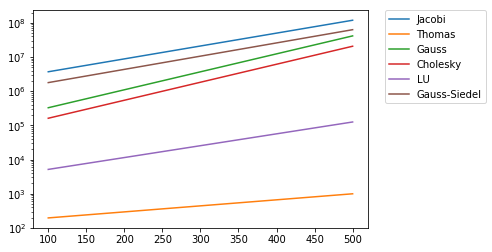

In [22]:
plt.plot(tam,it_jacobi,label='Jacobi')
plt.plot(tam,it_thomas,label='Thomas')
plt.plot(tam,it_gauss,label='Gauss')
plt.plot(tam,it_cholesky,label='Cholesky')
plt.plot(tam,it_lu,label='LU')
plt.plot(tam,it_gs,label='Gauss-Siedel')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
def preencheEx2(n):
    A = np.array([[0.0]*n]*n)
    B = np.array([0.0]*n)
    
    for i in range(n):
        B[i] = 1/(i+n+1)
        for j in range(n):
            A[i][j] = 1/(i+j+1)
            
    return A,B

In [ ]:
A,B = preencheEx2(5)